<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/075%20-%20Lesson%2075%20(Logistic%20Regression%20-%20Likelihood%20Functions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 75: Logistic Regression - Likelihood Function

### Teacher-Student Activities

In the previous class, you learnt to calculate the decision boundary by building a logistic regression model using the `sklearn` module. In this class, you will begin to learn to estimate the decision boundary purely through maths.

Let's quickly go through the activities covered in the previous class and begin this class from the **Activity 1: Regularised Cost Function** section.

---

#### Dummy Dataset



In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

The features array is an <class 'numpy.ndarray'> object.
The target array is an <class 'numpy.ndarray'> object.

The features array has 1000 rows and 2 columns.
The target array has 1000 rows and 1 column.
Target counts:
0    500
1    500
Name: target, dtype: int64


---

#### Cluster Visualisation

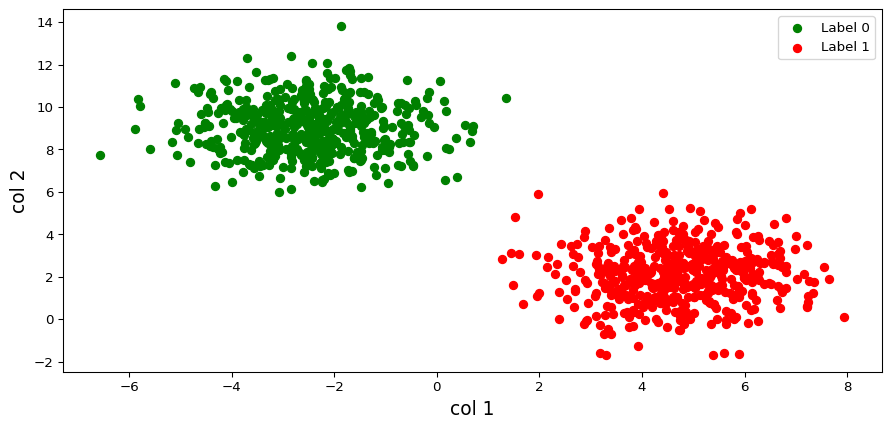

In [ ]:
# Scatter plot between 'col 1' and 'col 2' columns separately for both the classes in the same plot.
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 5), dpi = 96)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.xlabel('col 1', fontsize = 14)
plt.ylabel('col 2', fontsize = 14)
plt.legend()
plt.show()

#### Calculating Coefficients Using `sklearn` Module

Beta 0 = 6.3267
Beta 1 = 1.4679
Beta 2 = -1.3607


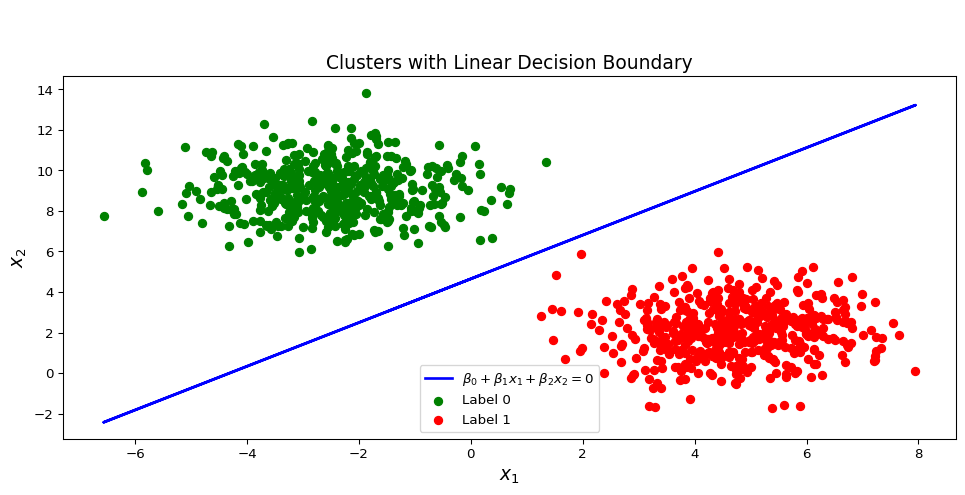

In [ ]:
# Coefficients Estimation by building a logistic regression model using the 'sklearn' model.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target

def decision_boundary_coeffs(X, y):
  logistic_reg = LogisticRegression(random_state=0).fit(X, y)
  coef_list = list(logistic_reg.intercept_) + list(logistic_reg.coef_[0])
  return coef_list

coef_list = decision_boundary_coeffs(X, y)
for i in range(len(coef_list)):
  print(f"Beta {i} = {coef_list[i]:.4f}")

# Plotting the decision boundary
pred_col2_values = - (coef_list[0] + coef_list[1] * dummy_df['col 1']) / coef_list[2]

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("\n\nClusters with Linear Decision Boundary", fontsize = 14)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.plot(dummy_df['col 1'], pred_col2_values, color = 'b', linewidth = 2, label = r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$")
plt.xlabel(r"$x_1$", fontsize = 14)
plt.ylabel(r"$x_2$", fontsize = 14)
plt.legend()
plt.show()

---

#### Predictions

The sigmoid function is given as
$$p =  \frac{1}{1 + e^{-h}}$$

where
- $p$ is the probability value between 0 and 1
- $h$ is some relationship between $x_1, x_2, x_3, \dots, x_n$
- $x_1, x_2, x_3, \dots, x_n$ are $n \in N$ feature(s) in a dataset

In this case of dummy dataset, $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

$$\therefore p =\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

where $\beta_0, \beta_1, \beta_2$ are coefficients and $x_1, x_2$ are the independent variables.

The above expression can also be written as

$$p =\frac{1}{1 + e^{-BX^T}}$$

where

- $X$ denotes the feature matrix i.e.

  $$X = \begin{bmatrix} 1 & x_{1,1} & x_{2,1} \\ 1 & x_{1,2} & x_{2,2}\\ 1 & x_{1,3} & x_{2,3} \\ \vdots & \vdots & \vdots \\ 1 & x_{1,1000} & x_{2,1000} \end{bmatrix}$$

  Each item in the above matrix can be represented by $x_{i,j}$ where $x_{i,j}$ denotes the $j^{\text{th}}$ item in the $i^{\text{th}}$ column. Also the values of $i$ goes from $1$ to $2$ and the values of $j$ goes from $1$ to $1000$.

- $B$ denotes the coefficients matrix i.e.

  $$B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$$

Essentially, $$h = BX^T$$


The above product after taking the transpose of the features matrix becomes

$$h = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix} \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,1000} \\ x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,1000} \end{bmatrix}$$


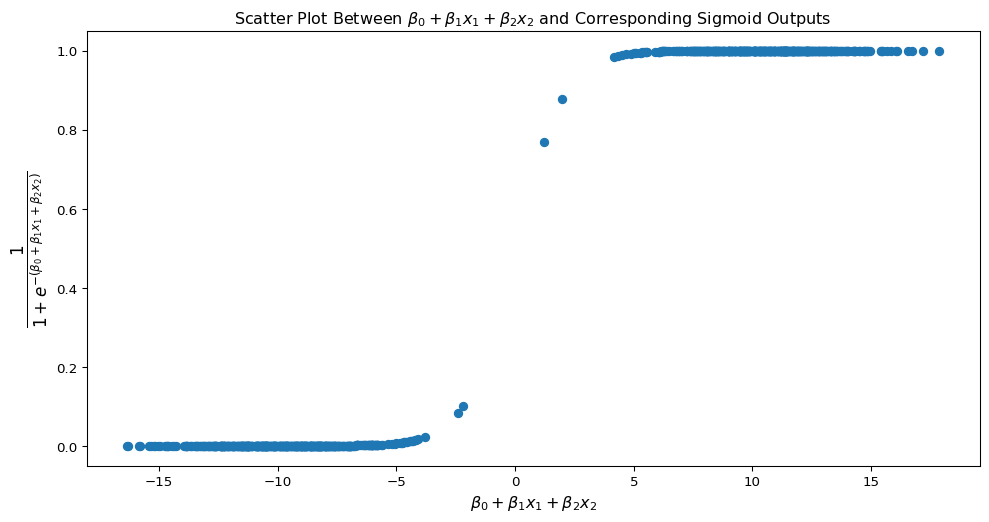

In [ ]:
# Adding a column containing 1s to the features array.
import numpy as np

new_features_array = np.append(np.ones(shape = (features_array.shape[0], 1)), features_array, axis = 1)

# Create the 'sigmoid()' function.
def sigmoid(features_matrix, coef_matrix):
    sigmoid_output_matrix = 1/(1 + np.exp(-1 * np.matmul(coef_matrix, np.transpose(features_matrix))))
    return np.array(sigmoid_output_matrix)

sigmoid_outputs = sigmoid(new_features_array, coef_list)

# Scatter plot between the 'h' values and their corresponding sigmoid outputs.
plt.figure(figsize = (12, 6), dpi = 96)
plt.title("Scatter Plot Between " + r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2$" + " and Corresponding Sigmoid Outputs")
plt.scatter(np.matmul(coef_list, np.transpose(new_features_array)), sigmoid_outputs)
plt.xlabel(r'$\beta_0 + \beta_1 x_1 + \beta_2 x_2$', fontsize = 12)
plt.ylabel(r'$\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$', fontsize = 18)
plt.show()

In [ ]:
# Predicting the target values w.r.t. the threshold value of 0.5
predicted_target = [1 if item >= 0.5 else 0 for item in sigmoid_outputs]

# Evaluate the accuracy of the logistic regression model built through confusion matrix, precision value, recall value and f1-score.
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(dummy_df['target'], predicted_target), "\n")
print(classification_report(dummy_df['target'], predicted_target))

[[500   0]
 [  0 500]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



---

#### Activity 1: Regularised Cost Function

After building a logistic regression model using the `sklearn` module of Python, we obtained the following values of the coefficients:

- $\beta_0 = 6.3267$
- $\beta_1 = 1.4679$
- $\beta_2 = -1.3607$

Now we need to obtain the same without using any Python module. For this, you will have to use the following expression (called the **regularised cost function**)

$$J(\beta) = -\frac{1}{m} \left[ \sum_{i = 1}^m \{ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \} \right]+ \frac{\lambda}{2m}\sum_{j = 1}^n \beta_j ^2$$

where

- $p_i = \frac{1}{1 + e^{-h_i}}$

- $h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_n x_{in}$

  In this case, $n = 2$

  $\therefore h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$

- $i$ is the row number in a data-frame

- $m$ is the total number of rows in a data-frame

- $n$ is the total number of independent variables in a data-frame

- $\lambda$ is the regularisation rate

- $y$ is the actual label (or class) i.e. either $y = 0$ or $ y = 1$


---

#### Activity 2: Steps to Build Regularised Cost Function^

Now let's learn how we obtained the above cost regularised cost function and how it provides the values of the coefficients.

Here are the steps to be followed to estimate the coefficients.

1. Consider a matrix of coefficients
   
   $$\beta = \begin{bmatrix}\beta_0 & \beta_1 & \beta_2 & \dots & \beta_n\end{bmatrix}$$

   and another matrix of features
   
   $$X = \begin{bmatrix}1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\ 1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\ 1 & x_{31} & x_{32} & x_{33} & \dots & x_{3n} \\ \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\1 & x_{m1} & x_{m2} & x_{m3} & \dots & x_{mn} \\\end{bmatrix}$$

   where $m$ is the number of records and $n$ is the number of features (or independent variables) in a dataset.

2. Calculate probabilities for each record using the sigmoid function

   $$p_i = \frac{1}{1 + e^{-h_i}}$$

3. Get the likelihood function
    
   $$L(\beta) = \prod_{i = 1}^m p_i^y (1 - p_i)^{(1 - y)}$$

4. Get the log likelihood function
    
   $$J(\beta) = \log L(\beta) = \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

5. Get the negative log likelihood function and divide it by the total number of records $m$
    
   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

6. Penalise the above cost function with a regularisation rate of $\lambda$

   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

Let's go through the above steps one-by-one.


---

#### Activity 3: Likelihood Equation^^

Consider a record $x_i$ in the $i^{\text{th}}$ row in the features matrix.

\begin{equation}
\therefore x_i = \begin{bmatrix}1 & x_{i1} & x_{i2} & x_{i3} & \dots & x_{in}\end{bmatrix}
\end{equation}

The hypothesis $h_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
h_i &= \begin{bmatrix}
\beta_0 & \beta_1 & \beta_2 & \beta_3 & \dots & \beta_n
\end{bmatrix}
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ x_{i3} \\ \dots \\ x_{in}
\end{bmatrix} \\
&= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in}
\end{aligned}

So the corresponding probability $p_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
p_i &= \frac{1}{1 + e^{-h_i}} \\
 &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in})}}
\end{aligned}

The function $p$ is dependent on both $\beta$ and $x$. Since $p$ is a probability, its value will range from 0 to 1.

Let $y = 1$ be the label for this $i^{\text{th}}$ record and $\hat{y}$ be the probability calculated through the sigmoid function. Mathematically, you can say

\begin{equation}
P(y = 1 \space{}| \space{} x; \beta) = p
\tag{3.1}
\end{equation}

The above expression is read as **the probability of any record having the label 1, for a given set of features ($x$) and coefficients ($\beta$), is $p$**.
The vertical bar i.e. $|$ is read as **given**.

Consequently, the probability of a record having label **NOT 1** (or having label 0) will be $1 - p$ because the sum of probabilities is 1.

So for the record $y = 0$, the equation $(3.1)$ becomes

\begin{equation}
P(y = 0 \space{}| \space{} x; \beta) = 1 - p
\tag{3.2}
\end{equation}

Now, we want an equation that can combine the equations $(3.1)$ and $(3.2)$ into one single equation. The required equation is given by

\begin{equation}
P(y \space{} | \space{} x; \beta) = p^y (1 - p)^{(1 - y)}
\tag{3.3}
\end{equation}

The above equation is called a **likelihood function** for one record.

If you substitute, $y = 1$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 1 \space{} | \space{} x) &= p(1 - p)^{1 - 1} \\
\Rightarrow P(y = 1 \space{} | \space{} x) &= p
\end{aligned}

And if you substitute, $y = 0$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 0 \space{} | \space{} x) &= p^0 (1 - p)^{1 - 0} \\
\Rightarrow P(y = 0 \space{} | \space{} x) &= 1 - p
\end{aligned}

Now our next task is to get the log likelihood function for $m$ number of records. But before that let's learn a mathematical concept called **logarithms**.

---

#### Activity 4: Logarithms^^^

A logarithm (in short log) tells you the exponent of a number or how many times a number should be multiplied with itself to get another number.

Eg., for how many times would you multiply $2$ with itself to obtain $32$?

The answer is $5$ because

\begin{equation}
2 \times 2 \times 2 \times 2 \times 2 = 32 \\
\tag{4.1}
\end{equation}

or

\begin{equation}
2^5 = 32
\tag{4.2}
\end{equation}

So, mathematically, you would say that the logarithm of $32$ w.r.t. the base $2$ is $5$. It is written is

\begin{equation}
\log_2 32 = 5
\tag{4.3}
\end{equation}

So, the equations $(4.2)$ and $(4.3)$ are the same i.e.

\begin{equation}
2^5 = 32 \Leftrightarrow \log_2 32 = 5
\end{equation}

Another eg. What should be the exponent of the base $7$ to get the number $343$. In other words, what should be the logarithm (or log) of $343$ on base $7$? Mathematically,

$$\log_7 343 = ?$$

The answer is $3$ i.e. $\log_7 343 = 3$ because $7^3 = 343$

In general, the log of a number $a$ on the base $b$ is given as

\begin{equation}
\log_b a = c
\end{equation}

i.e. when $b$ is multiplied $c$ times with itself (i.e. $b \times b \times b \dots c \space{} \text{times}$), the number obtained is $a$ i.e. $b^c = a$

\begin{equation}
\therefore b^c = a \Leftrightarrow \log_b a = c
\end{equation}

**Note:** The log is not defined for the negative numbers. Hence

- $a$ should be a positive real number i.e. $a > 0$

- $b$ should be a real number either between $0$ and $1$ or greater than $1$ i.e. $0 < b < 1$ or $b > 1$

- Since the output of a log is an exponent of a number on a base, it squeezes the very large numbers into the smaller numbers.

You may try to compute the log of a very large number, say 3,489,403,752 on a base of, say 13. For this, you can use the `log()` function of the `math` module in Python. Its syntax is

**Syntax:** `math.log(number, base)`

The first input to the `math.log()` function is the number for which the log is to be calculated and the second input is the base on which the log of the `number` needs to be calculated.



In [ ]:
# S4.1: Try to compute the log of a very large number say 3489403752 on a base of say 13.
import math

log1 = math.log(3489403752, 13)

As you can see, the log has squeezed the very large number 3,489,403,752 to 8.567 (approx) which is a very small number compared to 3,489,403,752.

In [ ]:
# S4.2: Raise the base of 13 to the power of log of 3489403752 on base 13.
13 ** log1

3489403752.0

**Log Property 1:** Here we have discovered one of the properties of log which is

$$b^{\log_b a} = a$$

It says, "**When a base is raised to the log of some number on that base, the result is the number**".

In this case, the base is $13$ and the number is $3489403752$. If you raise the base $13$ to the power of $\log_{13} 3489403752$, you will get the $3489403752$ as the result i.e.

$$13^{\log_{13} 3489403752} = 13$$

There are many more properties of logarithms that you will get to learn as the course progresses.

**Most Commonly Used Base:** In general, you can compute the log of a number on any base $b$ provided $0 < b < 1$ or $b > 1$ but the most commonly used bases are $b = e$ (where $e = 2.71$) and $b = 10$.

In fact, if the base is not specified in log, then $e$ is considered as the default base i.e. $\log a$ is the same as $\log_e a$

The log with base $e$ is also written as $\text{ln}$ which is a short-form for "log-natural". Therefore, $\log \text{a}$ is the same as $\log_e a$ is the same as $\text{ln a}$.

In [ ]:
# S4.3: Try to compute the log-natural and log to the base 10 of a very large number, say 3489403752.
# You can use the 'numpy' module to calculate the log values on base 10 and e.
import numpy as np

nat_log = np.log(3489403752)
print(nat_log)

log_10 = np.log10(3489403752)
print(log_10)

21.97299671386599
9.542751223710285


**Graphs of Logarithms**

Let's look at the nature of graphs of logarithms and what you can interpret from these graphs.

Let's create an array containing a few real numbers between 0.001 and 1000 (including both) and plot these numbers with their corresponding log values on the base 10.


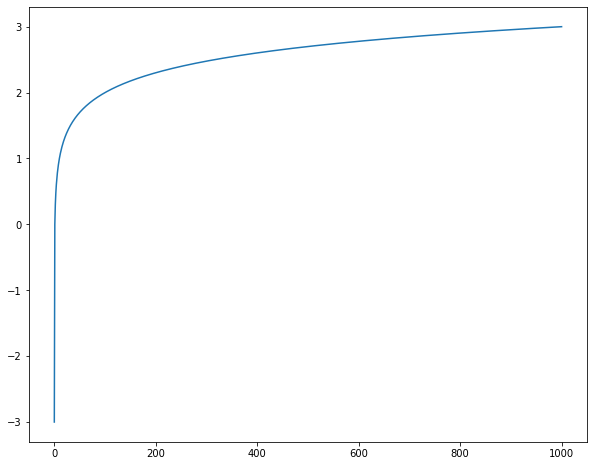

In [ ]:
# S4.4: create an array containing a few real numbers between 0.001 numbers between 0.001 and 1000 (including both).
# Plot these numbers with their corresponding log values on the base 10.
array1 = np.linspace(0.001, 1000, 1000)
plt.figure(figsize = (10,8))
plt.plot(array1, np.log10(array1))
plt.show()

From the above graph, you can see that **when the base $b$ is greater than 1, the graph of log continuously increases as the values on the $x$-axis increase.**

Also whenever $x$ is between 0 and 1 i.e. $0 < x < 1$, the corresponding log values are negative.

The graph of log rises very sharply for the initial values of $x$. As the $x$ values start increasing from a particular point, the curve starts flattening.

Now, let's create a graph of log when the base is less than 1.

In [ ]:
log_base_1 = [math.log(i, 0.1) for i in array1]

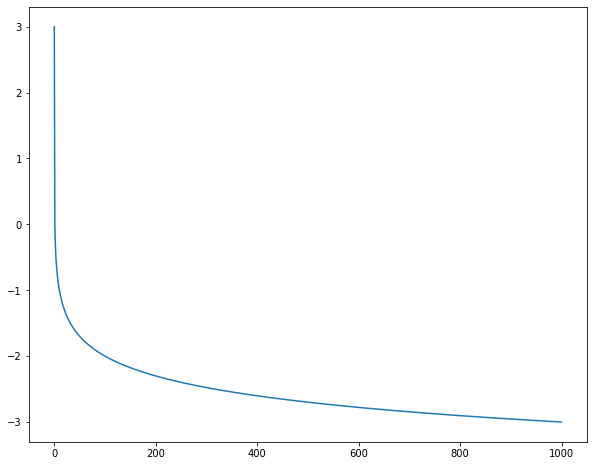

In [ ]:
# S4.5: Repeat the above exercise when the base is less than 1, say b = 0.1
array1 = np.linspace(0.001, 1000, 1000)
plt.figure(figsize = (10,8))
plt.plot(array1, log_base_1)
plt.show()

From the above graph, you can see that **when the base $b$ is less than 1, the graph of log continuously decreases as the values on the $x$-axis increase.**

Here, the graph of log drops very sharply for the initial values of $x$. As the $x$ values start increasing from a particular point, the curve starts flattening.

Now you have learnt enough of logarithms to understand the log likelihood function.

Let's stop here in the next class, you learn to create the log likelihood function.

---